In [1]:
import pandas as pd
import yfinance as yf
import yahoofinancials

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date

import matplotlib.pyplot as plt
import quandl as ql

import requests
import urllib.request
import time
from bs4 import BeautifulSoup
from selenium import webdriver


#####how many days the correlation is looking at
today = date.today()
d = datetime.timedelta(days=30)
start = today - d

In [2]:
def plot_tickers(tickers, start, end, interval, track, log_plot, normalize):
    data_df = yf.download(tickers,
                          start=start,
                          end=end,
                          interval=interval,
                          progress=False)

    # Drop any NaNs (e.g. when comparing SPY to 'BTC-USD')
    data_df = data_df.dropna()

    # normalize df
    if normalize == True:
        data_df = (data_df - data_df.mean()) / data_df.std()
    else:
        pass

    # Plot tickers
    ticker_list = tickers.split(' ')

    for ticker in ticker_list:
        if ticker == 'BTC-USD':  # put BTC on right axis
            ax = data_df[track, ticker].plot(secondary_y=True, figsize=(14, 10), legend=True, logy=log_plot, grid=True)
        else:
            ax = data_df[track, ticker].plot(figsize=(14, 10), legend=True, logy=log_plot, grid=True)

    ax.get_legend().set_bbox_to_anchor((1.3, 1))

    return data_df


def calc_correlation(data_df, track):
    # Get correlation and sort by sum
    sum_corr = data_df[track].corr().sum().sort_values(ascending=True).index.values

    data_df[track][sum_corr].corr()

    # Call the df with the list from summed correlation, sorted ascending.
    plt.figure(figsize=(13, 8))
    ax = sns.heatmap(data_df[track][sum_corr].corr(),
                     annot=True,
                     cmap="Blues")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)


'''Change inputs here:'''

'Change inputs here:'

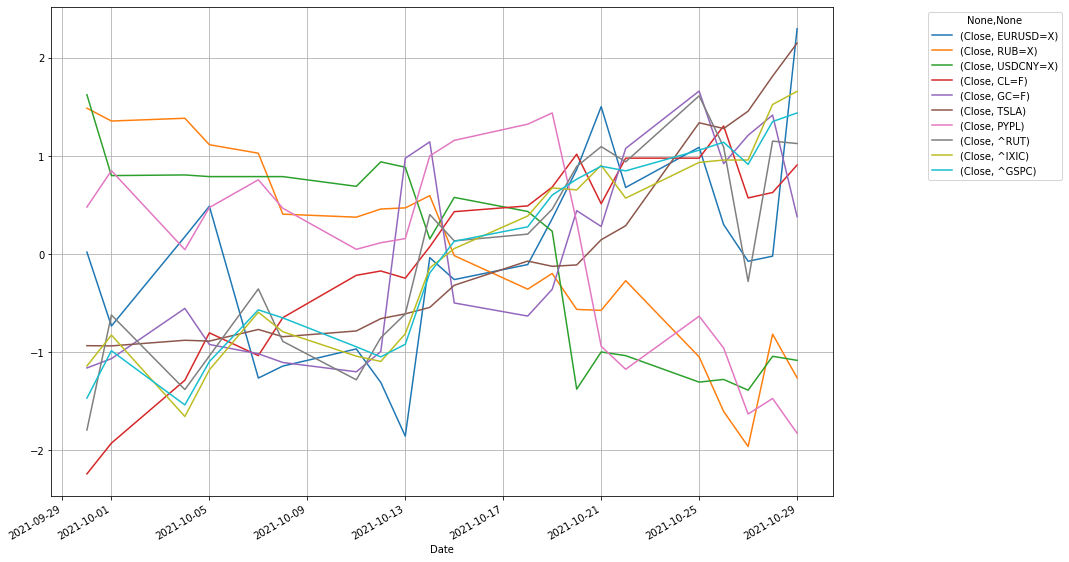

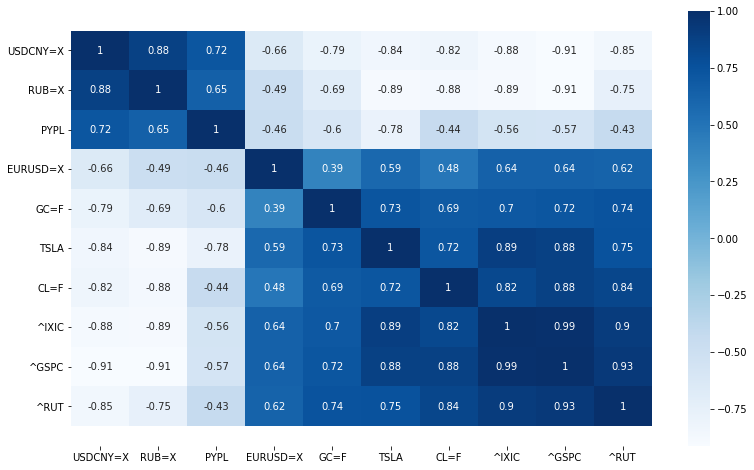

In [3]:
tickers = 'EURUSD=X RUB=X USDCNY=X CL=F GC=F TSLA PYPL ^RUT ^IXIC ^GSPC'

# Timeframe
start = '{}'.format(start)
end = '{}'.format(today)

# Time interval: can be 1m, 1h, 1d
interval = '1d'

# key to track: 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'
track = 'Close'

# plot options
log_plot = False
normalize = True

# plot trends
data_df = plot_tickers(tickers, start, end, interval, track, log_plot, normalize)
#plt.savefig('/home/ubuntu/Desktop/TelegramBot/charts/visualcorrelation30.jpeg', dpi=400, bbox_inches='tight')

# calculate and plot correlations
calc_correlation(data_df, track)
#plt.savefig('/home/ubuntu/Desktop/TelegramBot/charts/correlationmatrix30.jpeg', dpi=400, bbox_inches='tight')

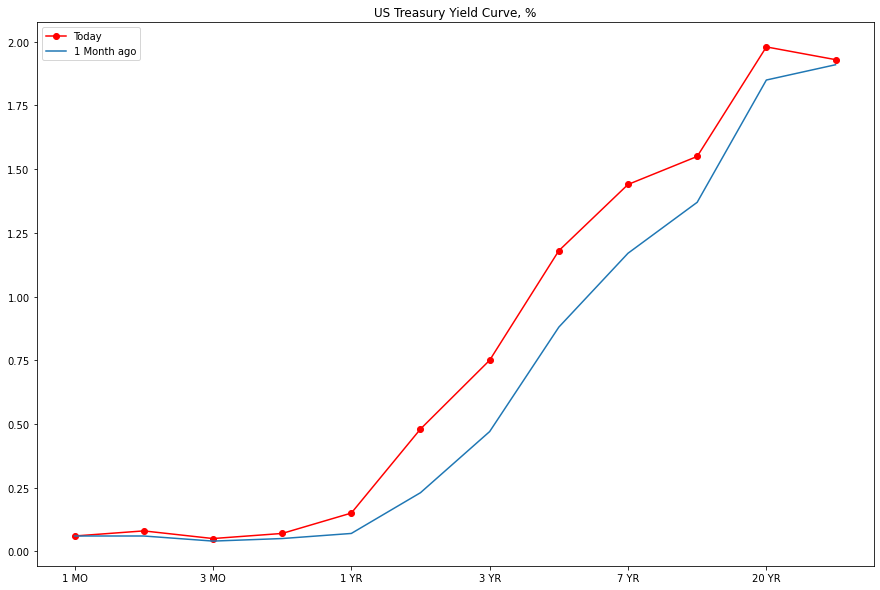

In [4]:



yield_ = ql.get("USTREASURY/YIELD")
today = yield_.iloc[-1,:]
month_ago = yield_.iloc[-30,:]
df = pd.concat([today, month_ago], axis=1)
df.columns = ['Today', '1 Month ago']
#plt.style.use('classic')


df.plot(style={'Today': 'ro-', '1 month ago': 'bx--'}
        ,title='US Treasury Yield Curve, %', figsize=(15,10));

plt.savefig('/home/ubuntu/Desktop/yieldUS.jpeg', dpi=400, bbox_inches='tight')

In [5]:
df

,Today,1 Month ago
1 MO,0.06,0.06
2 MO,0.08,0.06
3 MO,0.05,0.04
6 MO,0.07,0.05
1 YR,0.15,0.07
2 YR,0.48,0.23
3 YR,0.75,0.47
5 YR,1.18,0.88
7 YR,1.44,1.17
10 YR,1.55,1.37


In [6]:
url = 'https://fred.stlouisfed.org/series/INTDSRUSM193N'
response = requests.get(url)
response

<Response [200]>

In [7]:
# INTEREST RATES

# Set the URL you want to webscrape from
url = 'https://fred.stlouisfed.org/series/INTDSRUSM193N'

# Connect to the URL
response = requests.get(url)

# Parse HTML and save to BeautifulSoup object¶
soup = BeautifulSoup(response.text, "html.parser")

data = soup.findAll('span',{"class":"series-meta-observation-value"})[0].decode_contents()

print(data)

0.25


In [8]:
#m1 MONEY SUPPLY
url = 'https://fred.stlouisfed.org/series/WM1NS'

# Connect to the URL
response = requests.get(url)

# Parse HTML and save to BeautifulSoup object¶
soup = BeautifulSoup(response.text, "html.parser")


data = soup.findAll('span',{"class":"series-meta-observation-value"})[0].decode_contents()

print(data)

20,006.1


In [9]:
#student debt 
url = 'https://fred.stlouisfed.org/series/SLOAS'

# Connect to the URL
response = requests.get(url)

# Parse HTML and save to BeautifulSoup object¶
soup = BeautifulSoup(response.text, "html.parser")

data = soup.findAll('span',{"class":"series-meta-observation-value"})[0].decode_contents()

print(data)



1,732.22228


In [10]:
#debt to GDP ratio
url = 'https://fred.stlouisfed.org/series/GFDEGDQ188S'

# Connect to the URL
response = requests.get(url)

# Parse HTML and save to BeautifulSoup object¶
soup = BeautifulSoup(response.text, "html.parser")


data = soup.findAll('span',{"class":"series-meta-observation-value"})[0].decode_contents()

print(data)
    


125.45397


In [11]:

df = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GINIALLRH&scale=left&cosd=1967-01-01&coed=2020-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2020-01-01&line_index=1&transformation=lin&vintage_date=2021-10-27&revision_date=2021-10-27&nd=1967-01-01')

In [12]:
df = df.set_index('DATE')

<AxesSubplot:xlabel='DATE'>

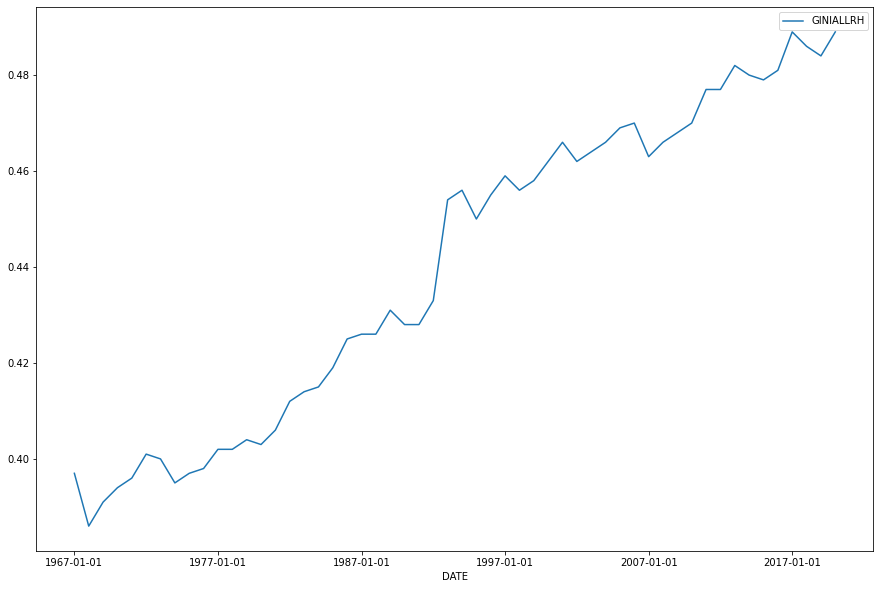

In [13]:
df.plot(figsize=(15,10))


In [14]:
import pandas as pd
df = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GINIALLRH&scale=left&cosd=1967-01-01&coed=2020-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2020-01-01&line_index=1&transformation=lin&vintage_date=2021-10-27&revision_date=2021-10-27&nd=1967-01-01')

In [15]:
df.drop('DATE',
  axis='columns', inplace=True)

In [16]:
df

,GINIALLRH
0,0.397
1,0.386
2,0.391
3,0.394
4,0.396
5,0.401
6,0.400
7,0.395
8,0.397
9,0.398


In [17]:
df.to_csv("df.csv")

In [18]:
pd.read_csv('df.csv')

,Unnamed: 0,GINIALLRH
0,0,0.397
1,1,0.386
2,2,0.391
3,3,0.394
4,4,0.396
5,5,0.401
6,6,0.400
7,7,0.395
8,8,0.397
9,9,0.398


In [19]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [20]:
data = pd.read_csv('df.csv')  # load data set
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

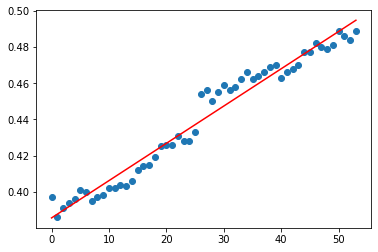

In [21]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [22]:
#https://www.cbr.ru/eng/hd_base/zcyc_params/zcyc/?DateTo=26/10/2021

In [23]:
#Key interest rate CBRF
url = 'https://www.cbr.ru/hd_base/KeyRate/'
# Connect to the URL
response = requests.get(url)
# Parse HTML and save to BeautifulSoup object¶
soup = BeautifulSoup(response.text, "html.parser")

data = soup.findAll('td',{"class":""})[1].decode_contents()

print(data)

7,50


In [24]:

dt = datetime.datetime.today()
year = dt.year
month = dt.month
day = dt.day - 1

d = datetime.date(year, month, day)
wd = d.weekday()

if wd == 6:
    day = dt.day - 2





In [25]:
#yield curve CBRF now
url = 'http://www.cbr.ru/eng/hd_base/zcyc_params/zcyc/?UniDbQuery.Posted=True&UniDbQuery.To=%sF%sF%s' % (day, month, year)       

# Connect to the URL
response = requests.get(url)

# Parse HTML and save to BeautifulSoup object¶
soup = BeautifulSoup(response.text, "html.parser")

index = []
rates = []
x = 1
for i in range(12):
    X = float(soup.findAll('th',{"class":""})[x].decode_contents())
    Y = float(soup.findAll('td',{"class":""})[x].decode_contents())
    
    x+=1
    index.append(X)
    rates.append(Y)
    

print(rates)
print(url)

[7.46, 7.79, 8.03, 8.19, 8.44, 8.43, 8.33, 8.25, 8.17, 8.11, 8.07, 8.03]
http://www.cbr.ru/eng/hd_base/zcyc_params/zcyc/?UniDbQuery.Posted=True&UniDbQuery.To=30F10F2021


In [26]:
d = datetime.date(year, month, day)

In [27]:
d.weekday()

5

In [28]:

year = datetime.date.today().year

In [32]:
#yield curve CBRF one month ago
dt = datetime.datetime.today()
year = dt.year
month = dt.month
day = dt.day - 1

d = datetime.date(year, month, day)
wd = d.weekday()

if wd == 6:
    day = dt.day - 2


url = 'http://www.cbr.ru/eng/hd_base/zcyc_params/zcyc/?UniDbQuery.Posted=True&UniDbQuery.To=27%2F09%2F2021'

# Connect to the URL
response = requests.get(url)

# Parse HTML and save to BeautifulSoup object¶
soup = BeautifulSoup(response.text, "html.parser")

index = []
rates1 = []
x = 1
for i in range(12):
    X = float(soup.findAll('th',{"class":""})[x].decode_contents())
    Y = float(soup.findAll('td',{"class":""})[x].decode_contents())
    
    x+=1
    index.append(X)
    rates1.append(Y)
    

print(rates1)
print(url)

[7.1, 7.1, 7.11, 7.12, 7.14, 7.17, 7.23, 7.29, 7.41, 7.63, 7.83, 8.12]
http://www.cbr.ru/eng/hd_base/zcyc_params/zcyc/?UniDbQuery.Posted=True&UniDbQuery.To=27%2F09%2F2021


In [ ]:
index = ["3M0","6MO","9M","1Y","2Y","3Y","5Y","7Y","10Y","15Y","20Y","30Y"]

In [ ]:
df = pd.DataFrame(list(zip(index, rates, rates1)),
               columns =['Maturity', 'Today', '1 Month ago'])

In [ ]:
df = df.set_index('Maturity')
df

In [ ]:
df.plot(style={'Today': 'ro-', '1 month ago': 'bx--'}
        ,title='Russian Government Bond Yield Curve, %', figsize=(15,10));


plt.savefig('/home/ubuntu/Desktop/yieldRU.jpeg', dpi=400, bbox_inches='tight')

In [ ]:
#debt to GDP ratio
url = 'https://www.usdebtclock.org/world-debt-clock.html'

# Connect to the URL
response = requests.get(url)

# Parse HTML and save to BeautifulSoup object¶
soup = BeautifulSoup(response.text, "html.parser")


data = soup.findAll('span',{"id":"X3a34729DW"})

print(data)
    

In [ ]:
<span id="X2a5BWRG">$28,926,279,227,683</span>

In [ ]:

htmlText = """<div class="systemRequirementsMainBox">
<div class="systemRequirementsRamContent">
<span title="000 Plus Minimum RAM Requirement">1 GB</span> </div>"""

soup = BeautifulSoup(htmlText)
spans = soup.findAll('span')
# spans = soup.findAll('span', attrs = {'class' : 'your-class-name'}) # or span by class name
# spans = soup.findAll('span', attrs = {'title' : '000 Plus Minimum RAM Requirement'}) # or span with a title
for span in spans:
    print(span.text)

In [ ]:

driver = webdriver.Firefox()
driver.get('https://www.usdebtclock.org/world-debt-clock.html')

# USA NATIONAL DEBT
USND = driver.find_element_by_xpath('//span[@id="X4a79R9BW"]').text

print(USND)

#print(elem2.text)
driver.close()

In [ ]:
from selenium import webdriver

driver = webdriver.Firefox()
driver.get('https://www.usdebtclock.org/world-debt-clock.html')
elem2 = driver.find_element_by_xpath('//span[@id="X4a79R9BW"]')
print(elem2.text)
driver.close()

In [ ]:
varListNames = ["USND", "USGDP", "USDR", "USEDR", "ZHND", "ZHGDP", "ZHDR", "ZHEDR", "JPND", "JPGDP", "JPDR", "JPEDR", "DEDR", "DEGDP", "DEDR", "DEEDR", "UKND", "UKGDP", "UKDR", "UKEDR", "RUND", "RUGDP", "RUDR", "RUEDR"]

x = varListNames[4]
print(x)
file = open(('data/%s.txt') % x, 'w')

In [ ]:
from selenium import webdriver

driver = webdriver.Firefox()
driver.get('https://www.usdebtclock.org/world-debt-clock.html')


# USA GDP NOMINAL
USGDP = driver.find_element_by_xpath('//span[@id="X4a79R9BW"]').text
# USA PUBLIC DEBT TO GDP RATIO
USDR = driver.find_element_by_xpath('//span[@id="X3a34729DW"]').text
# USA EXTERNAL DEBT TO GDP
USEDR = driver.find_element_by_xpath('//span[@id="X5a582BYTA"]').text

# CHINA NATIONAL DEBT
ZHND = driver.find_element_by_xpath('//span[@id="M2a0923KLS"]').text
# CHINA GDP NOMINAL
ZHGDP = driver.find_element_by_xpath('//span[@id="M4a951MKWX"]').text
# CHINA PUBLIC DEBT TO GDP RATIO
ZHDR = driver.find_element_by_xpath('//span[@id="M3a3182UUB"]').text
# CHINA EXTERNAL DEBT TO GDP
ZHEDR = driver.find_element_by_xpath('//span[@id="M5a371BYON"]').text

# JAPAN NATIONAL DEBT
JPND = driver.find_element_by_xpath('//span[@id="R2a9163KRX"]').text
# JAPAN GDP NOMINAL
JPGDP = driver.find_element_by_xpath('//span[@id="R4a189MKIK"]').text
# JAPAN PUBLIC DEBT TO GDP RATIO
JPDR = driver.find_element_by_xpath('//span[@id="R3a0202UKB"]').text
# JAPAN EXTERNAL DEBT TO GDP
JPEDR = driver.find_element_by_xpath('//span[@id="R5a672BYLM"]').text

# GERMANY NATIONAL DEBT
DEDR = driver.find_element_by_xpath('//span[@id="E2a8263KGD"]').text
# GERMANY GDP NOMINAL
DEGDP = driver.find_element_by_xpath('//span[@id="E4a59MKOP"]').text
# GERMANY PUBLIC DEBT TO GDP RATIO
DEDR = driver.find_element_by_xpath('//span[@id="E3a6302UMF"]').text
# GERMANY EXTERNAL DEBT TO GDP
DEEDR = driver.find_element_by_xpath('//span[@id="E5a172BYIB"]').text


# UK NATIONAL DEBT
UKND = driver.find_element_by_xpath('//span[@id="H2a6763MKJ"]').text
# UK GDP NOMINAL
UKGDP = driver.find_element_by_xpath('//span[@id="H4a17MKKN"]').text
# UK PUBLIC DEBT TO GDP RATIO
UKDR = driver.find_element_by_xpath('//span[@id="H3a3402ODV"]').text
# UK EXTERNAL DEBT TO GDP
UKEDR = driver.find_element_by_xpath('//span[@id="H5a382BYOL"]').text

# RUSSIA NATIONAL DEBT
RUND = driver.find_element_by_xpath('//span[@id="G2a5723KEC"]').text
# RUSSIA GDP NOMINAL
RUGDP = driver.find_element_by_xpath('//span[@id="G4a411MKMG"]').text
# RUSSIA PUBLIC DEBT TO GDP RATIO
RUDR = driver.find_element_by_xpath('//span[@id="G3a9582UWX"]').text
# RUSSIA EXTERNAL DEBT TO GDP
RUEDR = driver.find_element_by_xpath('//span[@id="G5a491BYOK"]').text

print(RUND)
print(DEDR)
driver.close()

In [ ]:
# get geckodriver to work...

'''

wget https://github.com/mozilla/geckodriver/releases/download/v0.30.0/geckodriver-v0.30.0-linux64.tar.gz

tar -xvzf geckodriver*

chmod +x geckodriver

sudo mv geckodriver /usr/local/bin/

'''

In [ ]:
# import all stocks you want to look at in dataframe: 

In [33]:
def plot_tickers(tickers, start, end, interval):
    df = yf.download(tickers,
                          start=start,
                          end=end,
                          interval=interval,
                          progress=False)

    return df


#####how many days the correlation is looking at
today = date.today()
d = datetime.timedelta(days=30)
start = today - d

tickers = 'EURUSD=X RUB=X USDCNY=X CL=F GC=F TSLA PYPL ^RUT ^IXIC ^GSPC'

# Timeframe
start = '{}'.format(start)
end = '{}'.format(today)

# Time interval: can be 1m, 1h, 1d
interval = '1d'

df = plot_tickers(tickers, start, end, interval)


In [34]:
df = df.drop(df.columns[10:60], axis=1)

In [36]:
#df = df.drop(df.columns[10:60], axis=1)
df.to_csv('data/stocks.csv')


In [37]:
df = pd.read_csv("data/stocks.csv")
df.rename(columns={'Unnamed: 0': 'Date'}, inplace = True)
#df = df.set_index(df['Date'])
#df = df.drop(['Date'], axis=1)
#df.columns = df.iloc[0]
df1 = df["Date"]
df1 = df1.iloc[2:]

df = df.drop(['Date'], axis=1)
df.columns = df.iloc[0]
df = df.iloc[2:]

numbers = df1

df = df.join(numbers)

df = df.set_index(df['Date'])
#df = df.set_index(df['Date'])
#df = df.rename({0: 'Date'}, axis=1)
#df.index.names = ['Date']
#df = df1["Date"]
df = df.drop(['Date'], axis=1)

In [38]:
df

,CL=F,EURUSD=X,GC=F,PYPL,RUB=X,TSLA,USDCNY=X,^GSPC,^IXIC,^RUT
Date,,,,,,,,,,
2021-09-30,75.02999877929688,1.1601601839065552,1755.300048828125,260.2099914550781,72.84590148925781,775.47998046875,6.469600200653076,4307.5400390625,14448.580078125,2204.3701171875
2021-10-01,75.87999725341797,1.1574475765228271,1757.0,264.6499938964844,72.71720123291016,775.219970703125,6.445499897003174,4357.0400390625,14566.7001953125,2241.6298828125
2021-10-04,77.62000274658203,1.160725712776184,1766.199951171875,255.00999450683594,72.74500274658203,781.530029296875,6.445700168609619,4300.4599609375,14255.48046875,2217.469970703125
2021-10-05,78.93000030517578,1.1618449687957764,1759.5999755859375,260.1499938964844,72.47989654541016,780.5900268554688,6.445199966430664,4345.72021484375,14433.830078125,2228.360107421875
2021-10-06,77.43000030517578,1.1596084833145142,1760.5,264.05999755859375,72.29090118408203,782.75,NaN,4363.5498046875,14501.91015625,2214.9599609375
2021-10-07,78.30000305175781,1.1555349826812744,1757.9000244140625,263.5400085449219,72.39459991455078,793.6099853515625,6.445199966430664,4399.759765625,14654.01953125,2250.090087890625
2021-10-08,79.3499984741211,1.1559758186340332,1756.300048828125,260.05999755859375,71.78350067138672,785.489990234375,6.445199966430664,4391.33984375,14579.5400390625,2233.090087890625
2021-10-11,80.5199966430664,1.1566041707992554,1754.5999755859375,255.0500030517578,71.75330352783203,791.9400024414062,6.442299842834473,4361.18994140625,14486.2001953125,2220.639892578125
2021-10-12,80.63999938964844,1.1553747653961182,1758.300048828125,255.85000610351562,71.83509826660156,805.719970703125,6.4496002197265625,4350.64990234375,14465.919921875,2234.27001953125


In [39]:
df.to_csv("data/stocks.csv")

In [40]:
df.tail()
#df.set_index([1])

,CL=F,EURUSD=X,GC=F,PYPL,RUB=X,TSLA,USDCNY=X,^GSPC,^IXIC,^RUT
Date,,,,,,,,,,
2021-10-25,83.76000213623047,1.1640088558197021,1806.0,246.8800048828125,70.35250091552734,1024.8599853515625,6.383900165557861,4566.47998046875,15226.7099609375,2312.639892578125
2021-10-26,84.6500015258789,1.161170482635498,1792.699951171875,243.0,69.80590057373047,1018.4299926757812,6.384699821472168,4574.7900390625,15235.7099609375,2296.080078125
2021-10-27,82.66000366210938,1.1598236560821533,1797.9000244140625,234.94000244140625,69.45379638671875,1037.8599853515625,6.381499767303467,4551.68017578125,15235.83984375,2252.489990234375
2021-10-28,82.80999755859375,1.1600120067596436,1801.5999755859375,236.8300018310547,70.58049774169922,1077.0400390625,6.391600131988525,4596.419921875,15448.1201171875,2297.97998046875
2021-10-29,83.56999969482422,1.1683608293533325,1783.0,232.58999633789062,70.14240264892578,1114.0,6.390399932861328,4605.3798828125,15498.3896484375,2297.18994140625


In [41]:
# find the percentage change with the previous row
df = pd.read_csv("data/stocks.csv")
df = df.set_index(df['Date'])
df = df.drop(['Date'], axis=1)

df = df.pct_change()

In [42]:
# calculate percent change

In [43]:
df.to_csv("data/pct_change.csv")

In [44]:
df

,CL=F,EURUSD=X,GC=F,PYPL,RUB=X,TSLA,USDCNY=X,^GSPC,^IXIC,^RUT
Date,,,,,,,,,,
2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-01,0.011329,-0.002338,0.000968,0.017063,-0.001767,-0.000335,-0.003725,0.011491,0.008175,0.016903
2021-10-04,0.022931,0.002832,0.005236,-0.036425,0.000382,0.008140,0.000031,-0.012986,-0.021365,-0.010778
2021-10-05,0.016877,0.000964,-0.003737,0.020156,-0.003644,-0.001203,-0.000078,0.010525,0.012511,0.004911
2021-10-06,-0.019004,-0.001925,0.000511,0.015030,-0.002608,0.002767,0.000000,0.004103,0.004717,-0.006013
2021-10-07,0.011236,-0.003513,-0.001477,-0.001969,0.001434,0.013874,0.000000,0.008298,0.010489,0.015860
2021-10-08,0.013410,0.000381,-0.000910,-0.013205,-0.008441,-0.010232,0.000000,-0.001914,-0.005083,-0.007555
2021-10-11,0.014745,0.000544,-0.000968,-0.019265,-0.000421,0.008211,-0.000450,-0.006866,-0.006402,-0.005575
2021-10-12,0.001490,-0.001063,0.002109,0.003137,0.001140,0.017400,0.001133,-0.002417,-0.001400,0.006138


In [45]:
CLF = df['CL=F'].iloc[-1]
print(CLF)

0.009177661618607225


In [46]:
df = pd.read_csv("data/pct_change.csv")
CLF = df['CL=F'].iloc[-1]
print(CLF)

0.0091776616186072


In [47]:
df = pd.read_csv("data/stocks.csv")
df

,Date,CL=F,EURUSD=X,GC=F,PYPL,RUB=X,TSLA,USDCNY=X,^GSPC,^IXIC,^RUT
0,2021-09-30,75.029999,1.160160,1755.300049,260.209991,72.845901,775.479980,6.4696,4307.540039,14448.580078,2204.370117
1,2021-10-01,75.879997,1.157448,1757.000000,264.649994,72.717201,775.219971,6.4455,4357.040039,14566.700195,2241.629883
2,2021-10-04,77.620003,1.160726,1766.199951,255.009995,72.745003,781.530029,6.4457,4300.459961,14255.480469,2217.469971
3,2021-10-05,78.930000,1.161845,1759.599976,260.149994,72.479897,780.590027,6.4452,4345.720215,14433.830078,2228.360107
4,2021-10-06,77.430000,1.159608,1760.500000,264.059998,72.290901,782.750000,NaN,4363.549805,14501.910156,2214.959961
5,2021-10-07,78.300003,1.155535,1757.900024,263.540009,72.394600,793.609985,6.4452,4399.759766,14654.019531,2250.090088
6,2021-10-08,79.349998,1.155976,1756.300049,260.059998,71.783501,785.489990,6.4452,4391.339844,14579.540039,2233.090088
7,2021-10-11,80.519997,1.156604,1754.599976,255.050003,71.753304,791.940002,6.4423,4361.189941,14486.200195,2220.639893
8,2021-10-12,80.639999,1.155375,1758.300049,255.850006,71.835098,805.719971,6.4496,4350.649902,14465.919922,2234.270020
9,2021-10-13,80.440002,1.153403,1793.699951,256.359985,71.846497,811.080017,6.4480,4363.799805,14571.639648,2241.969971


In [48]:
import talib.abstract as ta

today = date.today()
d = datetime.timedelta(days=365)
start = today - d

start = '{}'.format(start)
end = '{}'.format(today)

interval = '1d'


l = ['EURUSD=X', 'RUB=X', 'USDCNY=X', 'CL=F', 'GC=F', 'TSLA', 'PYPL', '^RUT', '^IXIC', '^GSPC']

for i in l:

    df = pd.DataFrame()
    
    ticker = i

    df = yf.download(ticker,start=start,end=end,interval=interval,progress=False)


    df.rename(columns={'Close': 'close'}, inplace = True)

    # 50 EMA
    n = 50
    EMA = pd.Series(df['close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    df = df.join(EMA)

    # 200 EMA 
    n = 200
    EMA = pd.Series(df['close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    df = df.join(EMA)

    df['RSI'] = ta.RSI(df)

    # save the CSV 
    print('Downloading historical data for %s' % i)
    df.to_csv("data/%s.csv" % i)


In [49]:
s = l[3]
rsi = round(d['RSI{}'.format(s)],2)
print(s)

TypeError: 'datetime.timedelta' object is not subscriptable

In [ ]:


l = ['EURUSD=X', 'RUB=X', 'USDCNY=X', 'CL=F', 'GC=F', 'TSLA', 'PYPL', '^RUT', '^IXIC', '^GSPC']



# 1) current price 2) pct change 3) EMA above below 4) RSI
d = {}

for i in l:
    
    df = pd.read_csv("data/stocks.csv")

    d["LivePrice{}".format(i)] = df[i].iloc[-1]

    df = pd.read_csv("data/pct_change.csv")

    d["pct_Change{}".format(i)] = df[i].iloc[-1]
    
    df = pd.read_csv("data/{}.csv".format(i))
    
    d["EMA_50{}".format(i)] = df['EMA_50'].iloc[-1]
    d["EMA_200{}".format(i)] = df['EMA_200'].iloc[-1]
    d["RSI{}".format(i)] = df['RSI'].iloc[-1]



In [ ]:
l2 = ['Euro', 'Ruble', 'CNYen', 'Brent', 'Gold', 'Tesla', 'Paypal', 'Russel', 'Nasdaq', 'DJI']

message = ''
x = 0

for i in l2:
    # iterate through list l
    s = l[x]
    # current price string 
    current = ('%s: $' % i) + str(round(d['LivePrice{}'.format(s)],2))
    # percent change 
    pct = d['pct_Change{}'.format(s)]
    
    percent = round((100 * pct),2)
    
    
    # percent change string 
    if percent > 0:
        percentChange = ' 🟢' + str(percent) + 'Δ%'
    else: 
        percentChange = ' 🔴' + str(percent) + 'Δ%'
    

    # EMA
    ema50 = round(d['EMA_50{}'.format(s)],2)
    ema200 = round(d['EMA_200{}'.format(s)],2)
    
    #EMA string
    if ema50 > ema200:
        
        EMA = ' EMA trend 📈 '
        
    else: 
        EMA = ' EMA trend 📉 '
    
    #RSI
    rsi = round(d['RSI{}'.format(s)],2)
    
    #RSI string
    if rsi > 70:
        RSI = ' RSI: {}'.format(rsi) + ' 🔥 '
        
    elif rsi < 30:
        RSI = ' RSI: {}'.format(rsi) + ' 💩 '
        
    else:
        RSI = ' RSI: {}'.format(rsi)
        
    
    m = current + percentChange + EMA + RSI + '\n'
    
    message = message + m
    
    x += 1
    

print(message)
#print("Euro: current price: " + str(d['LivePriceEURUSD=X']) + " d%: " + str(d['pct_ChangeEURUSD=X']))

In [50]:
# Crypto DF

In [51]:
import os
from pathlib import Path

import sys
import csv

# -----------------------------------------------------------------------------

root = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(''))))
sys.path.append(root + '/python')

import ccxt


# -----------------------------------------------------------------------------

def retry_fetch_ohlcv(exchange, max_retries, symbol, timeframe, since, limit):
    num_retries = 0
    try:
        num_retries += 1
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since, limit)
        # print('Fetched', len(ohlcv), symbol, 'candles from', exchange.iso8601 (ohlcv[0][0]), 'to', exchange.iso8601 (ohlcv[-1][0]))
        return ohlcv
    except Exception:
        if num_retries > max_retries:
            raise  # Exception('Failed to fetch', timeframe, symbol, 'OHLCV in', max_retries, 'attempts')


def scrape_ohlcv(exchange, max_retries, symbol, timeframe, since, limit):
    earliest_timestamp = exchange.milliseconds()
    timeframe_duration_in_seconds = exchange.parse_timeframe(timeframe)
    timeframe_duration_in_ms = timeframe_duration_in_seconds * 1000
    timedelta = limit * timeframe_duration_in_ms
    all_ohlcv = []
    while True:
        fetch_since = earliest_timestamp - timedelta
        ohlcv = retry_fetch_ohlcv(exchange, max_retries, symbol, timeframe, fetch_since, limit)
        # if we have reached the beginning of history
        if ohlcv[0][0] >= earliest_timestamp:
            break
        earliest_timestamp = ohlcv[0][0]
        all_ohlcv = ohlcv + all_ohlcv
        print(len(all_ohlcv), symbol, 'candles in total from', exchange.iso8601(all_ohlcv[0][0]), 'to', exchange.iso8601(all_ohlcv[-1][0]))
        # if we have reached the checkpoint
        if fetch_since < since:
            break
    return all_ohlcv


def write_to_csv(filename, exchange, data):
    p = Path("", str(exchange))
    p.mkdir(parents=True, exist_ok=True)
    full_path = p / str(filename)
    with Path(full_path).open('w+', newline='') as output_file:
        csv_writer = csv.writer(output_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerows(data)


def scrape_candles_to_csv(filename, exchange_id, max_retries, symbol, timeframe, since, limit):
    # instantiate the exchange by id
    exchange = getattr(ccxt, exchange_id)({
        'enableRateLimit': True,  # required by the Manual
    })
    # convert since from string to milliseconds integer if needed
    if isinstance(since, str):
        since = exchange.parse8601(since)
    # preload all markets from the exchange
    exchange.load_markets()
    # fetch all candles
    ohlcv = scrape_ohlcv(exchange, max_retries, symbol, timeframe, since, limit)
    # save them to csv file
    write_to_csv(filename, exchange, ohlcv)
    print('Saved', len(ohlcv), 'candles from', exchange.iso8601(ohlcv[0][0]), 'to', exchange.iso8601(ohlcv[-1][0]), 'to', filename)

    

In [52]:
#add the indicators


In [53]:
df = pd.DataFrame()

In [155]:
today = date.today()
d = datetime.timedelta(days=300)
s = str(today - d)
start = s + '00:00:00Z'

In [156]:
print(start)

2021-01-0400:00:00Z


In [157]:
l = ['BTC','ETH','UNI','CRV']

for i in l:
    file = '%s.csv' % i
    pair = '%s/USDT' % i 
    scrape_candles_to_csv(file, 'binance', 3, pair, '1d', start, 365)
    
'''    file = 'Binance/%s.csv' % i
    df1 = pd.read_csv(file, header=None)
    df[i] = df1[3]'''

365 BTC/USDT candles in total from 2020-11-01T00:00:00.000Z to 2021-10-31T00:00:00.000Z
Saved 365 candles from 2020-11-01T00:00:00.000Z to 2021-10-31T00:00:00.000Z to BTC.csv
365 ETH/USDT candles in total from 2020-11-01T00:00:00.000Z to 2021-10-31T00:00:00.000Z
Saved 365 candles from 2020-11-01T00:00:00.000Z to 2021-10-31T00:00:00.000Z to ETH.csv
365 UNI/USDT candles in total from 2020-11-01T00:00:00.000Z to 2021-10-31T00:00:00.000Z
Saved 365 candles from 2020-11-01T00:00:00.000Z to 2021-10-31T00:00:00.000Z to UNI.csv
365 CRV/USDT candles in total from 2020-11-01T00:00:00.000Z to 2021-10-31T00:00:00.000Z
Saved 365 candles from 2020-11-01T00:00:00.000Z to 2021-10-31T00:00:00.000Z to CRV.csv


"    file = 'Binance/%s.csv' % i\n    df1 = pd.read_csv(file, header=None)\n    df[i] = df1[3]"

In [158]:
df

,BTC_Open,BTC_High,BTC_Low,BTC_Close,ETH_Open,ETH_High,ETH_Low,ETH_Close,UNI_Open,UNI_High,UNI_Low,UNI_Close,CRV_Open,CRV_High,CRV_Low,CRV_Close
Unix,,,,,,,,,,,,,,,,
1604188800000,13791.00,13895.00,13603.00,13761.50,386.44,398.29,384.61,396.67,2.2648,2.4537,2.2190,2.3765,0.416,0.423,0.388,0.401
1604275200000,13761.49,13830.00,13195.05,13549.37,396.68,404.50,377.92,383.02,2.3764,2.4541,2.2228,2.2540,0.402,0.425,0.356,0.361
1604361600000,13549.63,14066.11,13284.99,14023.53,383.01,390.00,370.23,387.88,2.2526,2.2810,2.0554,2.1380,0.360,0.370,0.340,0.356
1604448000000,14023.53,14259.00,13525.00,14144.01,387.88,408.39,376.47,402.49,2.1360,2.1664,1.8758,1.9281,0.356,0.378,0.330,0.342
1604534400000,14144.01,15750.00,14093.56,15590.02,402.50,420.40,396.14,416.69,1.9271,2.4310,1.7563,2.1901,0.342,0.385,0.331,0.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635292800000,60328.81,61496.00,58000.00,58413.44,4131.52,4307.00,3909.00,3922.00,26.5700,28.3100,23.5000,24.1700,4.638,4.724,4.033,4.448
1635379200000,58413.44,62499.00,57820.00,60575.89,3921.99,4295.00,3890.17,4286.02,24.1600,25.3700,23.9100,24.8900,4.444,5.500,4.440,4.757
1635465600000,60575.90,62980.00,60174.81,62253.71,4286.01,4460.47,4265.97,4418.89,24.9000,25.8100,24.6600,25.5300,4.756,5.012,4.557,4.673


In [159]:
df = pd.read_csv('Binance/BTC.csv', header=None)

#df = df.drop(columns=[1,2,4,5])
#df = df.drop([2], axis=1)

In [160]:
df.rename(columns={0: 'Unix', 1: 'BTC_Open', 2: 'BTC_High',3: 'BTC_Low', 4:'BTC_Close'}, inplace = True)
df = df.drop(columns=[5])

#df.rename(columns={0: 'Unix', 3:'BTC'}, inplace = True)

In [161]:
l = ['BTC','ETH','UNI','CRV']

for i in l:
    
    file = 'Binance/%s.csv' % i
    df1 = pd.read_csv(file, header=None)
    
    df[i+'_Open'] = df1[1]
    df[i+'_High'] = df1[2]
    df[i+'_Low'] = df1[3]
    df[i+'_Close'] = df1[4] 
    
    #df[i] = df1[3]
df = df.set_index('Unix')
df.to_csv('data/crypto.csv')

In [162]:
df = pd.read_csv('data/crypto.csv')
df = df.set_index('Unix')


In [163]:
df = df.pct_change()
df

,BTC_Open,BTC_High,BTC_Low,BTC_Close,ETH_Open,ETH_High,ETH_Low,ETH_Close,UNI_Open,UNI_High,UNI_Low,UNI_Close,CRV_Open,CRV_High,CRV_Low,CRV_Close
Unix,,,,,,,,,,,,,,,,
1604188800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1604275200000,-0.002140,-0.004678,-0.029990,-0.015415,0.026498,0.015592,-0.017394,-0.034411,0.049276,0.000163,0.001712,-0.051546,-0.033654,0.004728,-0.082474,-0.099751
1604361600000,-0.015395,0.017072,0.006816,0.034995,-0.034461,-0.035847,-0.020348,0.012689,-0.052096,-0.070535,-0.075310,-0.051464,-0.104478,-0.129412,-0.044944,-0.013850
1604448000000,0.034975,0.013713,0.018066,0.008591,0.012715,0.047154,0.016854,0.037666,-0.051762,-0.050241,-0.087380,-0.098176,-0.011111,0.021622,-0.029412,-0.039326
1604534400000,0.008591,0.104566,0.042038,0.102235,0.037692,0.029408,0.052249,0.035280,-0.097800,0.122138,-0.063706,0.135885,-0.039326,0.018519,0.003030,0.052632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635292800000,-0.043596,-0.028399,-0.030385,-0.031749,-0.021050,0.002327,-0.044303,-0.050713,-0.006729,0.000353,-0.099272,-0.089642,-0.032742,-0.106657,-0.108138,-0.040759
1635379200000,-0.031749,0.016310,-0.003103,0.037020,-0.050715,-0.002786,-0.004817,0.092815,-0.090704,-0.103850,0.017447,0.029789,-0.041828,0.164268,0.100917,0.069469
1635465600000,0.037020,0.007696,0.040727,0.027698,0.092815,0.038526,0.096602,0.031001,0.030629,0.017343,0.031368,0.025713,0.070207,-0.088727,0.026351,-0.017658


In [164]:
df.to_csv('data/crypto_pct_change.csv')

In [165]:
df = pd.read_csv("data/crypto_pct_change.csv")
df = df.set_index('Unix')
df

,BTC_Open,BTC_High,BTC_Low,BTC_Close,ETH_Open,ETH_High,ETH_Low,ETH_Close,UNI_Open,UNI_High,UNI_Low,UNI_Close,CRV_Open,CRV_High,CRV_Low,CRV_Close
Unix,,,,,,,,,,,,,,,,
1604188800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1604275200000,-0.002140,-0.004678,-0.029990,-0.015415,0.026498,0.015592,-0.017394,-0.034411,0.049276,0.000163,0.001712,-0.051546,-0.033654,0.004728,-0.082474,-0.099751
1604361600000,-0.015395,0.017072,0.006816,0.034995,-0.034461,-0.035847,-0.020348,0.012689,-0.052096,-0.070535,-0.075310,-0.051464,-0.104478,-0.129412,-0.044944,-0.013850
1604448000000,0.034975,0.013713,0.018066,0.008591,0.012715,0.047154,0.016854,0.037666,-0.051762,-0.050241,-0.087380,-0.098176,-0.011111,0.021622,-0.029412,-0.039326
1604534400000,0.008591,0.104566,0.042038,0.102235,0.037692,0.029408,0.052249,0.035280,-0.097800,0.122138,-0.063706,0.135885,-0.039326,0.018519,0.003030,0.052632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635292800000,-0.043596,-0.028399,-0.030385,-0.031749,-0.021050,0.002327,-0.044303,-0.050713,-0.006729,0.000353,-0.099272,-0.089642,-0.032742,-0.106657,-0.108138,-0.040759
1635379200000,-0.031749,0.016310,-0.003103,0.037020,-0.050715,-0.002786,-0.004817,0.092815,-0.090704,-0.103850,0.017447,0.029789,-0.041828,0.164268,0.100917,0.069469
1635465600000,0.037020,0.007696,0.040727,0.027698,0.092815,0.038526,0.096602,0.031001,0.030629,0.017343,0.031368,0.025713,0.070207,-0.088727,0.026351,-0.017658


In [166]:
df = pd.DataFrame()

In [170]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from pandas import DataFrame
import pandas as pd
import talib.abstract as ta

import yfinance as yf
yf.pdr_override() 


l = ['BTC','ETH','UNI','CRV']

#for loop for each asset and indicator in the csv file
for i in l:
    
    df1 = pd.read_csv('data/crypto.csv')
    # reset the df 
    df = pd.DataFrame()
    # you don't need to reset index
    df['Unix'] = df1['Unix']
    
    # add column - don't want to call binance API too much thats why we import csv
    df['open'] = df1[i+'_Open']
    df['high'] = df1[i+'_High']
    df['low'] = df1[i+'_Low']
    df['close'] = df1[i+'_Close']
    
    #EMA 
    n = 50
    EMA = pd.Series(df['close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    df = df.join(EMA)

    n = 200
    EMA = pd.Series(df['close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    df = df.join(EMA)


    # TA lib indicators
    df['RSI'] = ta.RSI(df)

    # save the CSV 
    df.to_csv("data/%s.csv" % i)

df.tail()

,Unix,open,high,low,close,EMA_50,EMA_200,RSI
360,1635292800000,4.638,4.724,4.033,4.448,2.926950,2.404708,70.578183
361,1635379200000,4.444,5.500,4.440,4.757,2.998717,2.428758,73.386972
362,1635465600000,4.756,5.012,4.557,4.673,3.064375,2.451697,71.391697
363,1635552000000,4.673,5.322,4.551,4.736,3.129929,2.475039,72.006432
364,1635638400000,4.736,4.741,4.336,4.464,3.182245,2.495358,65.465749


In [171]:
df = pd.read_csv("data/BTC.csv")
df.tail()

,Unnamed: 0,Unix,open,high,low,close,EMA_50,EMA_200,RSI
360,360,1635292800000,60328.81,61496.00,58000.00,58413.44,53871.977334,46600.401045,52.225240
361,361,1635379200000,58413.44,62499.00,57820.00,60575.89,54134.876005,46743.287400,56.622157
362,362,1635465600000,60575.90,62980.00,60174.81,62253.71,54453.261809,46901.823612,59.719760
363,363,1635552000000,62253.70,62359.25,60673.00,61859.19,54743.690503,47054.665463,58.659039
364,364,1635638400000,61859.19,62405.30,60123.00,60574.99,54972.369019,47192.785851,55.220815


In [183]:
df = pd.read_csv("data/crypto.csv")

l = ['BTC','ETH','UNI','CRV']

# 1) current price 2) pct change 3) EMA above below 4) RSI
d = {}

for i in l:

    df = pd.read_csv("data/crypto.csv")

    x = i + '_Close'
    
    d["{}_Close".format(i)] = df[x].iloc[-1]

    df = pd.read_csv("data/crypto_pct_change.csv")

    d["{}_Close".format(i)] = df[x].iloc[-1]

    df = pd.read_csv("data/{}.csv".format(i))

    d["EMA_50{}".format(i)] = df['EMA_50'].iloc[-1]
    d["EMA_200{}".format(i)] = df['EMA_200'].iloc[-1]
    d["RSI{}".format(i)] = df['RSI'].iloc[-1]


l2 = ['BTC','ETH','UNI','CRV']

message = ''
x = 0

for i in l2:
    # iterate through list l
    s = l[x]
    # current price string 
    current = ('%s: ' % i) + str(round(d['{}_Close'.format(s)],2))
    # percent change 
    pct = d['{}_Close'.format(s)]

    percent = round((100 * pct),2)


    # percent change string 
    if percent > 0:
        percentChange = ' 🟢' + str(percent) + 'Δ%'
    else: 
        percentChange = ' 🔴' + str(percent) + 'Δ%'


    # EMA
    ema50 = round(d['EMA_50{}'.format(s)],2)
    ema200 = round(d['EMA_200{}'.format(s)],2)

    #EMA string
    if ema50 > ema200:

        EMA = ' EMA trend 📈 '

    else: 
        EMA = ' EMA trend 📉 '

    #RSI
    rsi = round(d['RSI{}'.format(s)],2)

    #RSI string
    if rsi > 70:
        RSI = ' RSI: {}'.format(rsi) + ' 🔥 '

    elif rsi < 30:
        RSI = ' RSI: {}'.format(rsi) + ' 💩 '

    else:
        RSI = ' RSI: {}'.format(rsi)


    m = current + percentChange + EMA + RSI + '\n'

    message = message + m

    x += 1

In [184]:
print(message)

BTC: -0.02 🔴-2.08Δ% EMA trend 📈  RSI: 55.22
ETH: -0.03 🔴-2.57Δ% EMA trend 📈  RSI: 58.58
UNI: -0.02 🔴-2.09Δ% EMA trend 📈  RSI: 45.89
CRV: -0.06 🔴-5.74Δ% EMA trend 📈  RSI: 65.47



In [ ]:
# feature for later 

"""# for loop

for i in l:
    df = pd.read_csv("%s.csv" % i)
    df['Return'] = 100 * (df['close'].pct_change())
    
    

    df.dropna(inplace=True)

    fig = plt.figure()
    fig.set_figwidth(12)
    plt.plot(df['Return'], label = 'Daily percent change')


    plt.legend(loc='lower left')
    plt.title('Daily Percent Change in %s Price' % i)
    plt.show()


    
    """

In [ ]:
from yahoo_fin import stock_info as si

In [ ]:
l = ['EURUSD=X', 'RUB=X', 'USDCNY=X', 'CL=F', 'GLD', 'TSLA', 'PYPL', '^RUT', '^IXIC', '^GSPC']

# 1) current price 2) pct change 3) EMA above below 4) RSI
d = {}

for i in l:

    d["LivePrice{0}".format(i)] = si.get_live_price(i)



In [ ]:
print(d)

In [ ]:
# create volatility charts for every stock 

In [ ]:
# add this to telegram bot

In [ ]:
# rsi and other indicators for crypto